In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import get_dummies
from pandas import concat
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn import ensemble
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import f_classif, f_regression, SelectKBest
from sklearn.pipeline import Pipeline
#from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor


import warnings 
warnings.filterwarnings('ignore')

c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv('BlackFriday.csv')
df = df[['User_ID', 'Product_ID','Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2',
         'Product_Category_3','Marital_Status', 'Purchase']]


In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Marital_Status,Purchase
0,1000001,P00069042,F,0-17,10,A,2,3,NaN,NaN,0,8370
1,1000001,P00248942,F,0-17,10,A,2,1,6.0,14.0,0,15200
2,1000001,P00087842,F,0-17,10,A,2,12,NaN,NaN,0,1422
3,1000001,P00085442,F,0-17,10,A,2,12,14.0,NaN,0,1057
4,1000002,P00285442,M,55+,16,C,4+,8,NaN,NaN,0,7969


In [4]:
df.describe()

,User_ID,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Marital_Status,Purchase
count,5.375770e+05,537577.00000,537577.000000,370591.000000,164278.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,5.295546,9.842144,12.669840,0.408797,9333.859853
std,1.714393e+03,6.52412,3.750701,5.087259,4.124341,0.491612,4981.022133
min,1.000001e+06,0.00000,1.000000,2.000000,3.000000,0.000000,185.000000
25%,1.001495e+06,2.00000,1.000000,5.000000,9.000000,0.000000,5866.000000
50%,1.003031e+06,7.00000,5.000000,9.000000,14.000000,0.000000,8062.000000
75%,1.004417e+06,14.00000,8.000000,15.000000,16.000000,1.000000,12073.000000
max,1.006040e+06,20.00000,18.000000,18.000000,18.000000,1.000000,23961.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Marital_Status                537577 non-null int64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.0+ MB


In [6]:
## Check for the same product, purchase amount variance 

df[df.Product_ID=='P00069042'].Purchase.nunique()

199

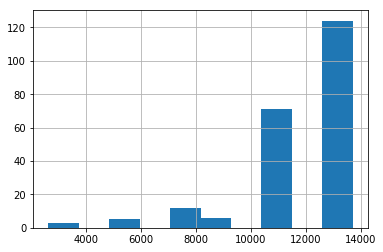

In [7]:
df[df.Product_ID=='P00069042'].Purchase.hist()

Cleaning up the data

In [8]:
columns = list(df.columns)
for column in columns:
    df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')

In [9]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [10]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df.Purchase.unique()

array([ 8370, 15200,  1422, ..., 14539, 11120, 18426], dtype=int64)

In [12]:
df.Purchase.max()

23961

In [13]:
df.Purchase.min()

185

In [14]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
#Recoding the catergorical values using replace
Age_cleanup = {'Age':   {'0-17': 0, '18-25': 1,'26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5,'55+':6}}
df.replace(Age_cleanup, inplace=True)
df.head(20)

City_cleanup ={'City_Category':   {'A': 0, 'B': 1,'C': 2}}
df.replace(City_cleanup, inplace=True)

Gender_cleanup = {'Gender': {'M': 1, 'F': 0}}
df.replace(Gender_cleanup, inplace=True)

#df['Purchase'] = df['Purchase'].apply(lambda x: 0 if x <= 5000 else 1 if x <= 10000 else 2 if x<= 15000 else 3 if x<=20000 else 4 )

In [16]:
df.Gender.unique()

array([0, 1], dtype=int64)

In [17]:
df.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [18]:
df = df.fillna(0)

In [19]:
#df.apply(pd.to_numeric)

In [20]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Marital_Status,Purchase
0,1000001,P00069042,0,0,10,0,2,3,0.0,0.0,0,8370
1,1000001,P00248942,0,0,10,0,2,1,6.0,14.0,0,15200
2,1000001,P00087842,0,0,10,0,2,12,0.0,0.0,0,1422
3,1000001,P00085442,0,0,10,0,2,12,14.0,0.0,0,1057
4,1000002,P00285442,1,6,16,2,4,8,0.0,0.0,0,7969


### EDA

In [21]:
df.describe()

,User_ID,Gender,Age,Occupation,City_Category,Product_Category_1,Product_Category_2,Product_Category_3,Marital_Status,Purchase
count,5.375770e+05,537577.000000,537577.000000,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,0.754087,2.494755,8.08271,1.040567,5.295546,6.784907,3.871773,0.408797,9333.859853
std,1.714393e+03,0.430627,1.352583,6.52412,0.759627,3.750701,6.211618,6.265963,0.491612,4981.022133
min,1.000001e+06,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,185.000000
25%,1.001495e+06,1.000000,2.000000,2.00000,0.000000,1.000000,0.000000,0.000000,0.000000,5866.000000
50%,1.003031e+06,1.000000,2.000000,7.00000,1.000000,5.000000,5.000000,0.000000,0.000000,8062.000000
75%,1.004417e+06,1.000000,3.000000,14.00000,2.000000,8.000000,14.000000,8.000000,1.000000,12073.000000
max,1.006040e+06,1.000000,6.000000,20.00000,2.000000,18.000000,18.000000,18.000000,1.000000,23961.000000


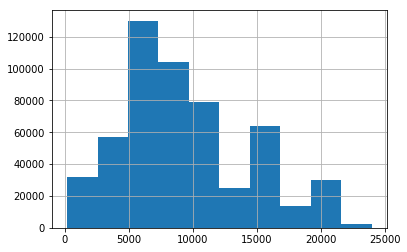

In [22]:
df.Purchase.hist()

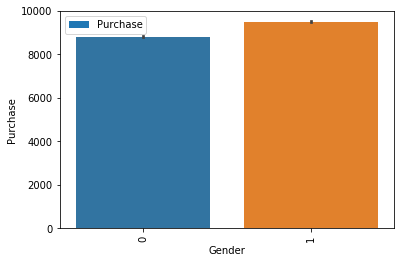

In [23]:
df[['Gender','Purchase']].groupby('Gender').mean().plot.bar()
sns.barplot('Gender', 'Purchase', data = df)
plt.show()

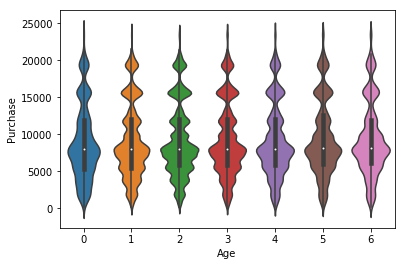

In [24]:
# df[['Age','Purchase']].groupby('Age').mean().plot.bar()
# sns.barplot('Age', 'Purchase', data = df)
# plt.show()
sns.violinplot(x='Age' , y='Purchase', data=df)

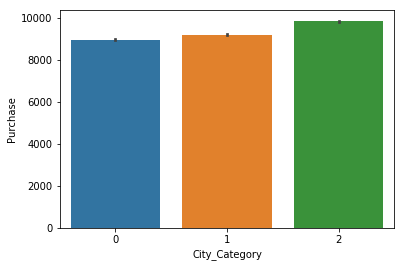

In [25]:
sns.barplot(x='City_Category', y='Purchase', data=df)

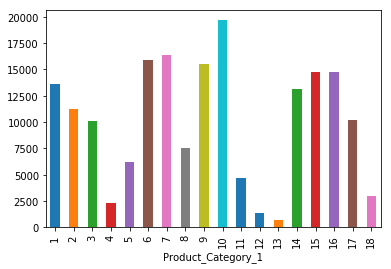

In [26]:
df.groupby('Product_Category_1').Purchase.mean().plot(kind = 'bar')
plt.show()

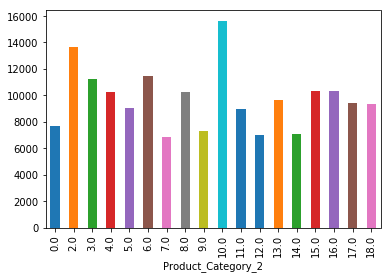

In [27]:
df.groupby('Product_Category_2').Purchase.mean().plot(kind = 'bar')
plt.show()

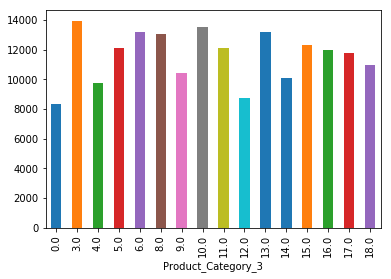

In [28]:
df.groupby('Product_Category_3').Purchase.mean().plot(kind = 'bar')
plt.show()

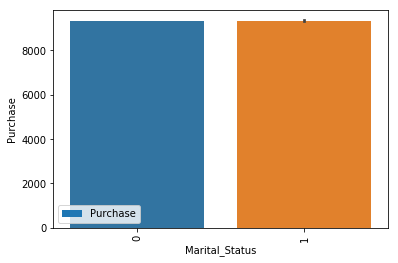

In [29]:
df[['Marital_Status','Purchase']].groupby('Marital_Status').mean().plot.bar()
sns.barplot('Marital_Status', 'Purchase', data = df)
plt.show()

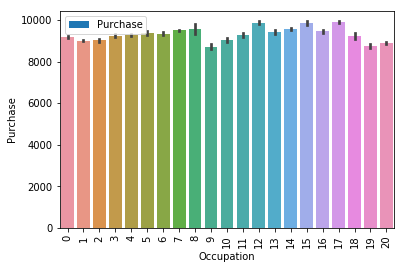

In [30]:
df[['Occupation','Purchase']].groupby('Occupation').mean().plot.bar()
sns.barplot('Occupation', 'Purchase', data = df)
plt.show()

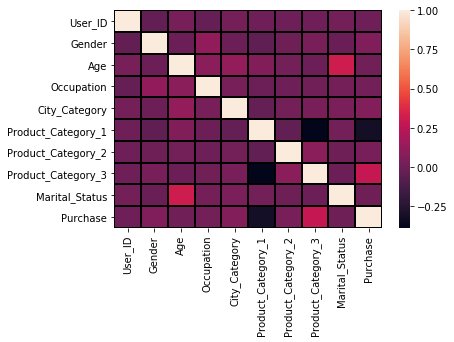

In [31]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, linecolor='k', linewidths=1)

In [32]:
#temp = pd.get_dummies(df.Product_Category_1, prefix='dummies')
#df2 = pd.concat([df, temp], axis =1)

In [33]:
#df2.columns

In [68]:
features = df[['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Product_Category_1', 
               'Product_Category_2', 'Product_Category_3','Marital_Status']]
X = features
y = df.Purchase

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [70]:
# create a lookup of purchase per product ID 

In [71]:
temp = X_train
temp['Purchase'] = y_train
temp1 = temp.groupby(['Product_ID']).Purchase.mean().reset_index()
temp1.columns = ['Product_ID', 'Avg_Purchase_Per_Product']
temp = pd.merge(temp,temp1,on = 'Product_ID') 
X_train = temp.drop(['Product_ID'] , 1)
y_train =temp.Purchase
X_test= pd.merge(X_test, temp1, on = 'Product_ID', how='left')
X_test.drop(['Product_ID'] , 1, inplace=True)
X_test.fillna(0, inplace=True) 

In [72]:
temp = X_train
temp['Purchase'] = y_train
temp2 = temp.groupby(['User_ID']).Purchase.mean().reset_index()
temp2.columns = ['User_ID', 'Avg_Purchase_Per_User']
temp = pd.merge(temp,temp2,on = 'User_ID') 
X_train = temp.drop(['User_ID', 'Purchase'] , 1)
y_train =temp.Purchase
X_test= pd.merge(X_test, temp2, on = 'User_ID', how='left')
X_test.drop(['User_ID'] , 1, inplace=True)
X_test.fillna(0, inplace=True) 

In [73]:
X_train.shape,y_train.shape

((403182, 11), (403182,))

In [74]:
X_test.shape,y_test.shape

((134395, 11), (134395,))

In [75]:
## linear regression 
lr = linear_model.LinearRegression() 
lr.fit(X_train,y_train)
print ('Score on test', (lr.score(X_test,y_test)) )

Score on test 0.7261501053859667


In [76]:
## KNN  
knn = KNeighborsRegressor() 
knn.fit(X_train,y_train)
print ('Score on test', (knn.score(X_test,y_test)) )

Score on test 0.6842528628771378


In [77]:
#random forest
rf = ensemble.RandomForestRegressor()
rf.fit(X_train,y_train)
print ('Score on test', (rf.score(X_test,y_test))) 
#cross_val_score(rf, X_train, y_train, cv=5)

Score on test 0.7062841344820567


In [78]:
# print(rf.score(X_train,y_train))
# print(rf.score(X_test,y_test))

In [79]:
#lasso regression, alpha = 5
lr = linear_model.Lasso(alpha=5, fit_intercept=False) 
lr.fit(X_train, y_train)
#scores_lr = cross_val_score(lr, X_train, y_train, cv=5)
#score_lr = cross_val_score(lr, X_train, y_train, cv=5).mean()
print('Lambda:', 5)
#print('Coefficients: \n', lr.coef_)
print ('Score on test', (lr.score(X_test,y_test))) 
#print('Cross-Validation Scores: \n', scores_lr)
#print('Averaged Cross-Validation Scores: {:.2%}.\n'.format(score_lr))

Lambda: 5
Score on test 0.717627377242453


In [80]:
#lasso regression, alpha = 10
lr = linear_model.Lasso(alpha=10, fit_intercept=False) 
lr.fit(X_train, y_train)
scores_lr = cross_val_score(lr, X_train, y_train, cv=5)
score_lr = cross_val_score(lr, X_train, y_train, cv=5).mean()
print('Lambda:', 10)
#print('Coefficients: \n', lr.coef_)
# print('Cross-Validation Scores: \n', scores_lr)
# print('Averaged Cross-Validation Scores: {:.2%}.\n'.format(score_lr))
print ('Score on test', (lr.score(X_test,y_test))) 

Lambda: 10
Score on test 0.7176328353492448


In [81]:
# gradient boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
# scores_gb = cross_val_score(gb, X_train,y_train, cv=5)
# score_gb = cross_val_score(gb, X_train, y_train, cv=5).mean() 
# print('Cross-Validation Scores: \n', scores_gb)
# print('Averaged Cross-Validation Scores: {:.2%}.\n'.format(score_gb))
print ('Score on test', (gb.score(X_test,y_test)))  

Score on test 0.7328444606232539


Best parameter: {'n_estimators': 100}
Best score: 0.74


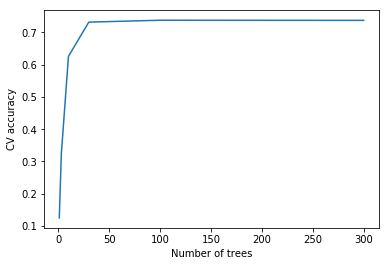

In [82]:
#let's grid search on gb: takes long time!  
param_grid = {'n_estimators':[1,3,10,30,100,150,300]}
grid_rf = GridSearchCV(GradientBoostingRegressor(),param_grid,cv=3).fit(X_train,y_train)
plt.figure()
plt.plot(list(param_grid.values())[0],grid_rf.cv_results_['mean_test_score'])
plt.xlabel('Number of trees')
plt.ylabel('CV accuracy')
print('Best parameter: {}'.format(grid_rf.best_params_))
print('Best score: {:.2f}'.format(grid_rf.best_score_))

In [83]:
## now different than the vanilla gb 

In [84]:
##xgboost 
#xg = XGBRegressor() 
#xg.fit(X_train.values, y_train.values) 

#print ('Score on test', (xg.score(X_test.values,y_test.values)))  

In [85]:
# importances = {}

# for feature, importance in zip(X_test.columns, gb.feature_importances_):
#     importances[feature] = importance

# importances_desc = sorted(importances.items(), key=lambda x: x[1], reverse=True)
# importances_desc = pd.DataFrame(importances_desc, columns=['feature','importance'])

In [86]:
# importances_desc.head(10)

Winning Model is Gradient Boosting
Feature rank among 7 features:
Avg_Purchase_Per_Product      0.460
Avg_Purchase_Per_User         0.304
City_Category                 0.058
Product_Category_1            0.047
Gender                        0.045
Age                           0.036
Occupation                    0.017
Product_Category_2            0.016
Stay_In_Current_City_Years    0.009
Product_Category_3            0.006
Marital_Status                0.000
dtype: float64


Text(0.5,0,'relative importance')

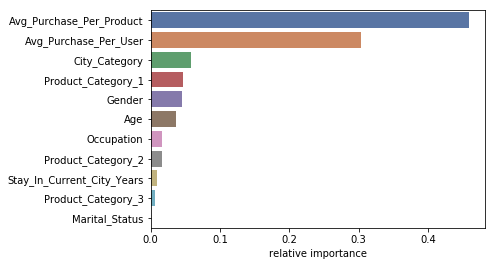

In [87]:
print('Winning Model is Gradient Boosting')
print('===============================')
f_im = gb.feature_importances_.round(3)
ser_rank = pd.Series(f_im,index=X_train.columns).sort_values(ascending=False)
print("Feature rank among 7 features:")
print(ser_rank)
plt.figure()
sns.barplot(y=ser_rank.index,x=ser_rank.values,palette='deep')
plt.xlabel('relative importance')

In [88]:
# scaler = StandardScaler()
# selector1 = SelectKBest(f_classif, k='all')
# rfc2 = ensemble.RandomForestClassifier()

Text(0.5,1,'Residual Plot')

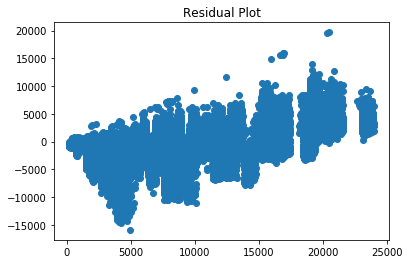

In [89]:
y_pred= gb.predict(X_test)
plt.scatter(y_test, y_test-y_pred)
plt.title('Residual Plot')

## Conclusions

1) After trying different models for predicting the amount of a Black Friday Purchase, it seems that the gradient boosting model is the best one with an accuracy score of 73%

2) I tried other models such as linear regression, lasso regression, KNN, and random forest but they were not as effective as the gradient boosting model. 

3) It is possible to improve our score perhaps by making new features or grouping purchase amount by product category.




## Next Steps

1) Get descriptions of products and categories in order better analyze the data and create a better model for prediction. 

2) Conduct further research to determine the national average purchase amount during Black Friday.
